# Building A Handwritten Digits Classifier

In this Guided Project, we'll:

- observe the limitations of traditional machine learning models for image classification
- train, test, and improve a few different deep neural networks for image classification

Scikit-learn contains a number of datasets pre-loaded with the library, within the namespace of sklearn.datasets. The load_digits() function returns a copy of the hand-written digits dataset from UCI.

Because dataframes are a tabular representation of data, each image is represented as a row of pixel values. To visualize an image from the dataframe, we need to reshape the image back to its original dimensions (8 x 8 pixels). To visualize the image, we need to reshape these pixel values back into the 8 by 8 and plot them on a coordinate grid.

To reshape the image, we need to convert a training example to a numpy array (excluding the label column) and pass the result into that into the numpy.reshape() function.


In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = load_digits()

features = pd.DataFrame(data['data'])
labels = pd.Series(data['target'])

full_dataset = features.copy()

full_dataset['target'] = labels


In [2]:
full_dataset.head(15)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


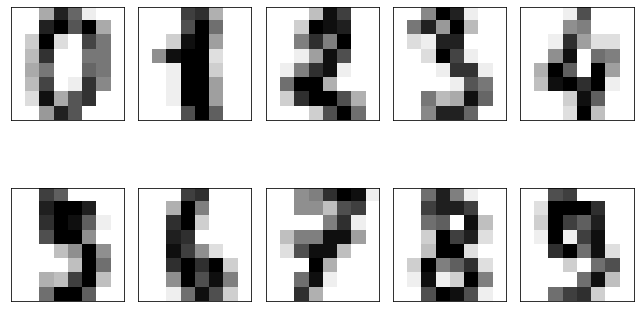

In [3]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, row in zip(axs.flat, features.iloc[:10]):    
    np_image = np.array(features.iloc[row])
    np_image = np_image.reshape(8,8)
    ax.imshow(np_image, cmap='gray_r')

plt.tight_layout()
plt.show()

## Split and Shuffle the data

The data is randomly shuffled and split into train and test sets.

### Create folds for k fold cross validation

The assigned fold number is stored in the 'fold' column

In [4]:
def create_folds(n_folds, df):
    np.random.seed(8)
    shuffled_index = np.random.permutation(df.index)
    shuffled_df = df.loc[shuffled_index]

    folded_df = shuffled_df.copy()
    fold_length = int(df.shape[0]/n_folds)
    for fold in range(1, n_folds ):
        folded_df.loc[folded_df.index[fold_length*(fold-1) : fold_length*(fold-1) + fold_length], 'fold'] = fold
    folded_df.loc[folded_df.index[fold_length*(n_folds -1)  : ], 'fold'] = n_folds
    return folded_df
    

In [5]:
folded_data = create_folds(4, full_dataset)

In [6]:
folded_data['fold'].isnull().sum()

0

In [7]:
folded_data['fold'].value_counts()

4.0    450
3.0    449
2.0    449
1.0    449
Name: fold, dtype: int64

## KNN Algorithm

This method does not have a specific model representation, it is an algorithm not a model.

It does not make assumptions of linearity between features, such as linear and logistic regression.

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [9]:
def train(k, train_features, train_labels):
    knn = KNeighborsRegressor(n_neighbors = k, algorithm = 'brute')
    knn.fit(train_features, train_labels)
    return knn
   

In [16]:
def test(model, test_features, test_labels):   
    predictions = model.predict(test_features)
    accuracy = sum(predictions == test_labels ) / len(test_labels)
    return accuracy


In [11]:
def cross_validate(df, n_neighbors, n_folds):
    
    fold_df = create_folds(n_folds, df)   
    
    
    folds = [i  for i in range(1, n_folds + 1 )]
    fold_accuracies = []
    for fold in folds:
        train_set = fold_df[fold_df['fold'] != fold]
        test_set = fold_df[fold_df['fold'] == fold]
        
        train_features = train_set.drop(['target', 'fold'], axis = 1)
        train_target = train_set['target']
        
        test_features = test_set.drop(['target', 'fold'], axis = 1)
        test_target = test_set['target']
        
        model = train(n_neighbors, train_features, train_target)
        accuracy = test(model, test_features, test_target)
        fold_accuracies.append(accuracy)
        
    return fold_accuracies
   

In [12]:
test_n_folds = [i  for i in range(2, 4 + 1 )]
test_n_neighbors = [i  for i in range(1, 5 + 1 )]

Accuracy values of 1 neurons and 4 folds: [0.9866369710467706, 0.9888641425389755, 0.9888641425389755, 0.9822222222222222]
Accuracy values of 2 neurons and 4 folds: [0.977728285077951, 0.977728285077951, 0.977728285077951, 0.9644444444444444]
Accuracy values of 3 neurons and 4 folds: [0.9665924276169265, 0.9688195991091314, 0.9665924276169265, 0.9466666666666667]
Accuracy values of 4 neurons and 4 folds: [0.9532293986636972, 0.9510022271714922, 0.9576837416481069, 0.9288888888888889]
Accuracy values of 5 neurons and 4 folds: [0.9287305122494433, 0.933184855233853, 0.9398663697104677, 0.9155555555555556]


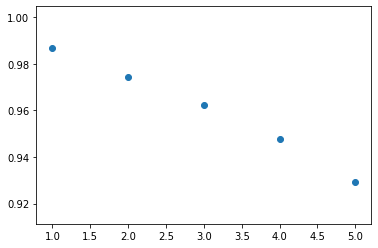

In [15]:
n_folds = 4
accuracies = []
for n_neighbor in test_n_neighbors:
    fold_accuracies = cross_validate(full_dataset, n_neighbor, 4)
    print('Accuracy values of {} neurons and {} folds: {}'.format(n_neighbor, n_folds , fold_accuracies))
    accuracies.append(np.mean(fold_accuracies))
    
plt.scatter(test_n_neighbors, accuracies)
plt.show()

The dataset is very homogeneus and the accuracy values are similar throughout the folds. The best performance is attained with one nearest neighbor.


## Neural Networks with MLPClassifier()

This model is a Multi-Layer Perceptron Classifier. It optimizes the log-loss function using LBFGS or stochastic gradient descent.

The solver used is the default 'adam'.

Activation function such as sigmoid and Tanh are compared.

### Single Hidden Layer model

In [18]:
from sklearn.neural_network import MLPClassifier

def train_NN(n_neurons, train_features, train_labels, activation = 'logistic'):
    nnm = MLPClassifier(hidden_layer_sizes=n_neurons, activation = activation ,max_iter = 1000)
    nnm.fit(train_features, train_labels)
    return nnm

An almost indentical cross_validation function is made, but chaning neighbors with neurons to clarify

In [19]:
def cross_validate_NN(df, n_neurons, n_folds, activation = 'logistic'):
    
    fold_df = create_folds(n_folds, df)   
    
    
    folds = [i  for i in range(1, n_folds + 1 )]
    fold_accuracies = []
    for fold in folds:
        train_set = fold_df[fold_df['fold'] != fold]
        test_set = fold_df[fold_df['fold'] == fold]
        
        train_features = train_set.drop(['target', 'fold'], axis = 1)
        train_target = train_set['target']
        
        test_features = test_set.drop(['target', 'fold'], axis = 1)
        test_target = test_set['target']
        
        model = train_NN(n_neurons, train_features, train_target)
        accuracy = test(model, test_features, test_target)
        fold_accuracies.append(accuracy)
        
    return fold_accuracies

In [20]:
test_n_neurons = [(8,),(16,),(32,),(64,),(128,),(256,)]

C:\Users\adrig\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\adrig\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\adrig\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy values of (8,) neurons and 4 folds: [0.9443207126948775, 0.9443207126948775, 0.9175946547884187, 0.9244444444444444]
Accuracy values of (16,) neurons and 4 folds: [0.9621380846325167, 0.9710467706013363, 0.9599109131403119, 0.96]
Accuracy values of (32,) neurons and 4 folds: [0.9732739420935412, 0.9799554565701559, 0.9799554565701559, 0.9577777777777777]
Accuracy values of (64,) neurons and 4 folds: [0.9755011135857461, 0.9866369710467706, 0.9755011135857461, 0.9666666666666667]
Accuracy values of (128,) neurons and 4 folds: [0.977728285077951, 0.9866369710467706, 0.9799554565701559, 0.9666666666666667]
Accuracy values of (256,) neurons and 4 folds: [0.9755011135857461, 0.9888641425389755, 0.977728285077951, 0.9733333333333334]


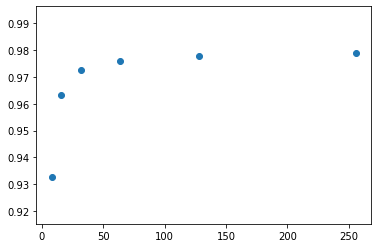

In [21]:
n_folds = 4
accuracies = []
for n_neurons in test_n_neurons:
    fold_accuracies = cross_validate_NN(full_dataset, n_neurons, 4)
    print('Accuracy values of {} neurons and {} folds: {}'.format(n_neurons, n_folds , fold_accuracies))
    accuracies.append(np.mean(fold_accuracies))
    
plt.scatter(test_n_neurons, accuracies)
plt.show()

The improvement of accuracy is negligible after 64 neurons. Comparing to the KNN model it still underperforms, so it might be helpful to add a second layer of neurons.

### Two Layer Perceptron

In [22]:
test_n_neurons = [(8,8,),(16,16,),(32,32,),(64,64)]

C:\Users\adrig\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\adrig\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\adrig\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\adrig\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, 

Accuracy values of (8, 8) neurons and 4 folds: [0.9242761692650334, 0.8975501113585747, 0.8841870824053452, 0.8844444444444445]
Accuracy values of (16, 16) neurons and 4 folds: [0.9510022271714922, 0.9510022271714922, 0.9576837416481069, 0.9377777777777778]
Accuracy values of (32, 32) neurons and 4 folds: [0.9643652561247216, 0.977728285077951, 0.9599109131403119, 0.9622222222222222]
Accuracy values of (64, 64) neurons and 4 folds: [0.9732739420935412, 0.9866369710467706, 0.9755011135857461, 0.9622222222222222]


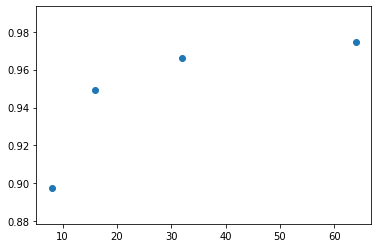

In [23]:
n_folds = 4
accuracies = []
for n_neurons in test_n_neurons:
    fold_accuracies = cross_validate_NN(full_dataset, n_neurons, 4)
    print('Accuracy values of {} neurons and {} folds: {}'.format(n_neurons, n_folds , fold_accuracies))
    accuracies.append(np.mean(fold_accuracies))

        
plt.scatter([i[0] for i in test_n_neurons], accuracies)
plt.show()

### Three Layer Perceptron

In [25]:
test_n_neurons = [(8,8,8,),(64,64,64,), (128,128,128,)]

C:\Users\adrig\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\adrig\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\adrig\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\adrig\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, 

Accuracy values of (8, 8, 8) neurons and 4 folds: [0.6703786191536748, 0.8953229398663697, 0.8062360801781737, 0.8644444444444445]
Accuracy values of (64, 64, 64) neurons and 4 folds: [0.9576837416481069, 0.977728285077951, 0.9688195991091314, 0.9511111111111111]
Accuracy values of (128, 128, 128) neurons and 4 folds: [0.9710467706013363, 0.9821826280623608, 0.9665924276169265, 0.96]


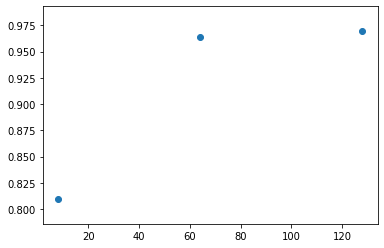

In [26]:
n_folds = 4
accuracies = []
for n_neurons in test_n_neurons:
    fold_accuracies = cross_validate_NN(full_dataset, n_neurons, 4)
    print('Accuracy values of {} neurons and {} folds: {}'.format(n_neurons, n_folds , fold_accuracies))
    accuracies.append(np.mean(fold_accuracies))

        
plt.scatter([i[0] for i in test_n_neurons], accuracies)
plt.show()